In [1]:
from EEG_utils.EEG_utils import *

In [2]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\chbmit\\1.0.0\\"
patient_id = "chb03"
record_id = "02"

Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb03\chb03_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:154: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


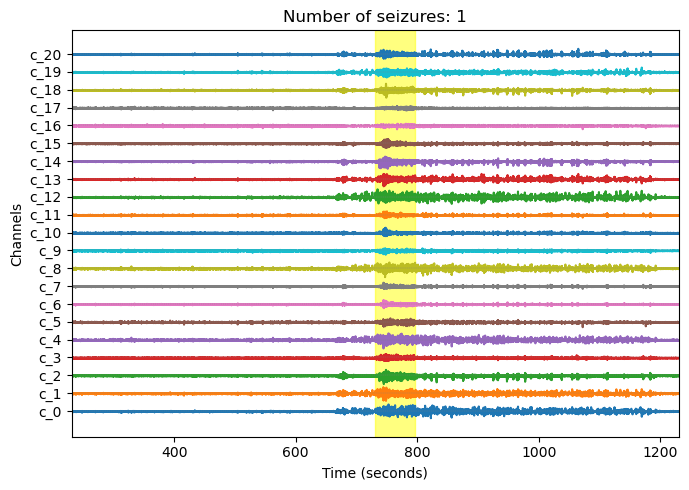

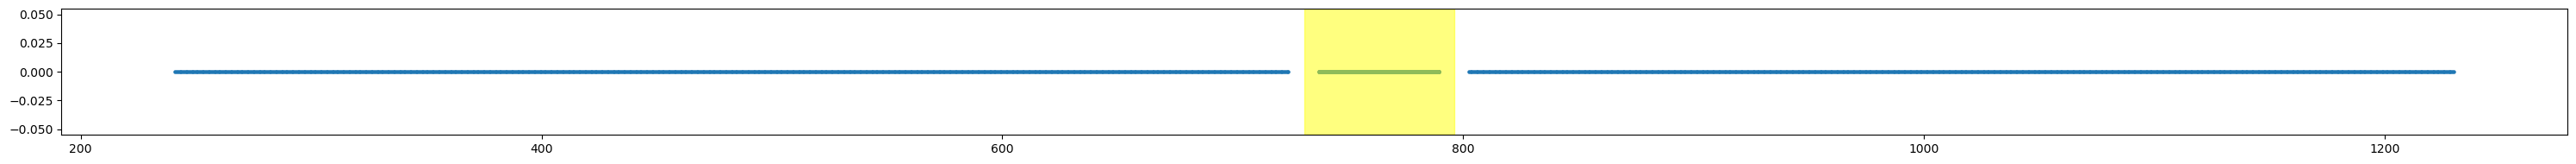

k: 2560 ---> t: 241.0 (seizure class: 0)
k: 2726 ---> t: 241.6484375 (seizure class: 0)
k: 2892 ---> t: 242.296875 (seizure class: 0)
k: 3058 ---> t: 242.9453125 (seizure class: 0)
k: 3224 ---> t: 243.59375 (seizure class: 0)
k: 3390 ---> t: 244.2421875 (seizure class: 0)
k: 3556 ---> t: 244.890625 (seizure class: 0)
k: 3722 ---> t: 245.5390625 (seizure class: 0)
k: 3888 ---> t: 246.1875 (seizure class: 0)
k: 4054 ---> t: 246.8359375 (seizure class: 0)
k: 4220 ---> t: 247.484375 (seizure class: 0)
k: 4386 ---> t: 248.1328125 (seizure class: 0)
k: 4552 ---> t: 248.78125 (seizure class: 0)
k: 4718 ---> t: 249.4296875 (seizure class: 0)
k: 4884 ---> t: 250.078125 (seizure class: 0)
k: 5050 ---> t: 250.7265625 (seizure class: 0)
k: 5216 ---> t: 251.375 (seizure class: 0)
k: 5382 ---> t: 252.0234375 (seizure class: 0)
k: 5548 ---> t: 252.671875 (seizure class: 0)
k: 5714 ---> t: 253.3203125 (seizure class: 0)
k: 5880 ---> t: 253.96875 (seizure class: 0)
k: 6046 ---> t: 254.6171875 (seizure 

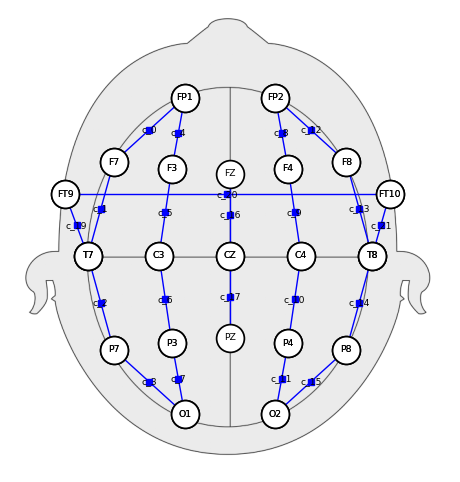

In [ ]:
# Create patient
patient = Patient( FilePatient(root_folder, patient_id, record_id) )

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [4]:
import datetime

now = datetime.datetime.now()
print("Ultima esecuzione completa:", now.strftime("%d/%m/%Y, ore %H:%M"))

Ultima esecuzione completa: 03/03/2025, ore 14:46
